## **Introduction**

### Thyroid disease (TD) is one of the most progressive endocrine disorders in the human population today. Prediction of the endocrine disease is a critical task in the field of clinical data analysis. Machine Learning (ML) has shown effective results in the decision making and predictions from the enormous data generated by healthcare domain. Various studies in the prediction of thyroid disease have given only a glimpse using machine learning algorithms. In this project we have proposed three models based on the primary dataset collected from 3772  patients.

## **Import Libraries**

In [2]:
#pandas
import pandas as pd

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import pickle
import warnings
warnings.filterwarnings('ignore')

## **Read data from csv**

In [3]:
thyroid_df = pd.read_csv('hypothyroid.csv')
thyroid_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


## **Data Cleaning**

In [4]:
thyroid_df.rename(columns={'binaryClass':'Label'},inplace=True)

In [5]:
thyroid_df.replace('?',np.nan,inplace=True)

In [6]:
thyroid_df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

In [7]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3771 non-null   object
 1   sex              3622 non-null   object
 2   sick             3772 non-null   object
 3   pregnant         3772 non-null   object
 4   thyroid surgery  3772 non-null   object
 5   I131 treatment   3772 non-null   object
 6   lithium          3772 non-null   object
 7   goitre           3772 non-null   object
 8   tumor            3772 non-null   object
 9   TSH              3403 non-null   object
 10  T3               3003 non-null   object
 11  TT4              3541 non-null   object
 12  T4U              3385 non-null   object
 13  FTI              3387 non-null   object
 14  Label            3772 non-null   object
dtypes: object(15)
memory usage: 442.2+ KB


In [8]:
thyroid_df['thyroid surgery'].value_counts()

thyroid surgery
f    3719
t      53
Name: count, dtype: int64

In [9]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
    thyroid_df[i] = pd.to_numeric(thyroid_df[i])

In [10]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   object 
 3   pregnant         3772 non-null   object 
 4   thyroid surgery  3772 non-null   object 
 5   I131 treatment   3772 non-null   object 
 6   lithium          3772 non-null   object 
 7   goitre           3772 non-null   object 
 8   tumor            3772 non-null   object 
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  Label            3772 non-null   object 
dtypes: float64(6), object(9)
memory usage: 442.2+ KB


## **Handle Missing Values**

In [11]:
thyroid_df.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Label                0
dtype: int64

In [12]:
miss_cols = ['FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    thyroid_df[i] = thyroid_df[i].fillna(thyroid_df[i].mean())

In [13]:
thyroid_df.dropna(inplace=True)

In [14]:
thyroid_df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Label              0
dtype: int64

In [15]:
thyroid_df = thyroid_df.drop(1364)

In [16]:
thyroid_df.TT4 = thyroid_df.TT4.astype(int)
thyroid_df.FTI = thyroid_df.FTI.astype(int)
thyroid_df.age = thyroid_df.age.astype(int)

In [68]:
thyroid_df

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Label
0,41,F,f,f,f,f,f,f,f,1.300000,2.5000,125,1.140,109,P
1,23,F,f,f,f,f,f,f,f,4.100000,2.0000,102,0.995,110,P
2,46,M,f,f,f,f,f,f,f,0.980000,2.0135,109,0.910,120,P
3,70,F,f,f,f,f,f,f,f,0.160000,1.9000,175,0.995,110,P
4,70,F,f,f,f,f,f,f,f,0.720000,1.2000,61,0.870,70,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,t,5.086766,2.0135,108,0.995,110,P
3768,68,F,f,f,f,f,f,f,f,1.000000,2.1000,124,1.080,114,P
3769,74,F,f,f,f,f,f,f,f,5.100000,1.8000,112,1.070,105,P
3770,72,M,f,f,f,f,f,f,f,0.700000,2.0000,82,0.940,87,P


## **EDA**

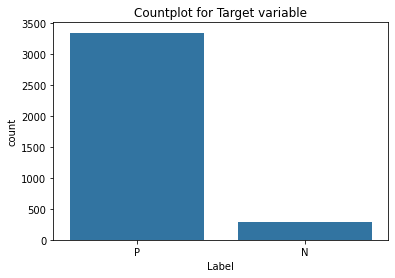

In [17]:
sns.countplot(x='Label',data=thyroid_df)
plt.title("Countplot for Target variable");

In [18]:
positive_df = thyroid_df[thyroid_df.Label=='P']

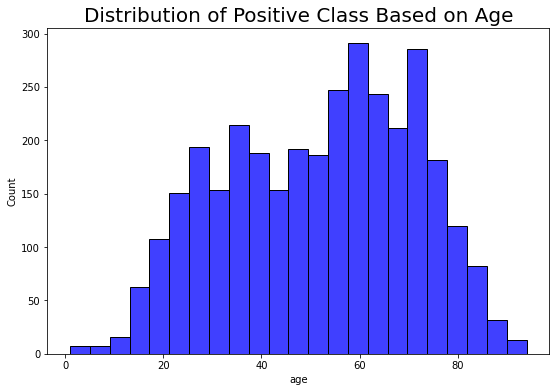

In [19]:
plt.figure(figsize=(9,6))
sns.histplot(x='age',data=positive_df,color='blue')
plt.title("Distribution of Positive Class Based on Age",{'fontsize':20});

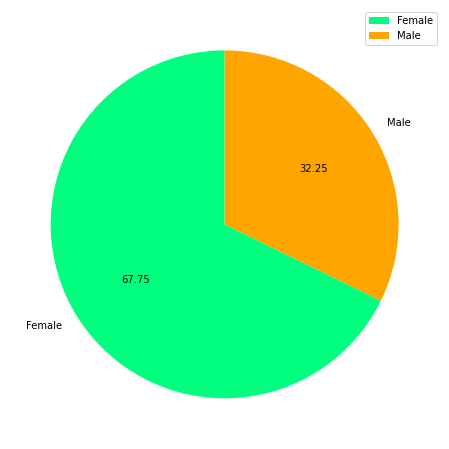

In [20]:
plt.figure(figsize=(10,8))
plt.pie(x=positive_df.sex.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['springgreen','orange'],
        autopct='%.2f'
       );
plt.legend();

## **Inference :**
### Female patients who has disease is greater than male patients.

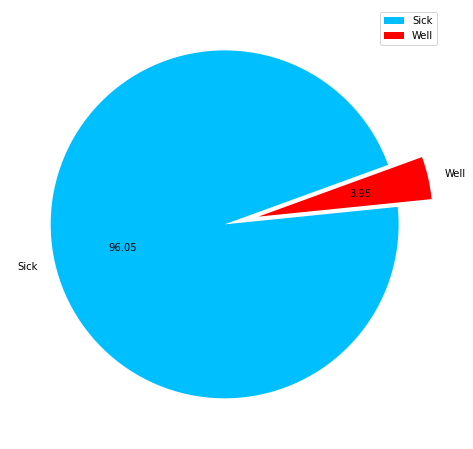

In [21]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sick.value_counts(),
        labels=['Sick','Well'],
        startangle = 20,
        colors=['deepskyblue','red'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();

In [22]:
X = thyroid_df.drop('Label',axis=1)
y = thyroid_df.Label

## **Transform non-numerical labels to numerical labels.**

In [23]:
s_encoder = LabelEncoder()
si_encoder = LabelEncoder()
preg_encoder = LabelEncoder()
th_encoder = LabelEncoder()
treat_encoder = LabelEncoder()
lith_encoder = LabelEncoder()
g_encoder= LabelEncoder()
tu_encoder = LabelEncoder()

In [24]:
X['sex'] = s_encoder.fit_transform(X.sex)
X['I131 treatment'] = treat_encoder.fit_transform(X['I131 treatment'])
X['sick'] = si_encoder.fit_transform(X.sick)
X['pregnant'] = preg_encoder.fit_transform(X.pregnant)
X['thyroid surgery'] = th_encoder.fit_transform(X['thyroid surgery'])
X['lithium'] = lith_encoder.fit_transform(X['lithium'])
X['goitre'] = g_encoder.fit_transform(X['goitre'])
X['tumor'] = tu_encoder.fit_transform(X['tumor'])

In [25]:
# output1 = open('sex_lbl.pkl', 'wb')
# pickle.dump(s_encoder, output1)
# output1.close()
# output2 = open('surgery.pkl', 'wb')
# pickle.dump(th_encoder, output2)
# output2.close()

In [26]:
def func(df):
    if df == 'P':
        return 1
    else:
        return 0

In [27]:
y = y.apply(func)

## **Split original data into training data and testing data.**

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

## **Handle Imbalance Data**

In [29]:
smote = SMOTE(random_state=11)

x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [30]:
print("Shape before the Oversampling : ",X_train.shape)
print("Shape after the Oversampling : ",x_smote.shape)


Shape before the Oversampling :  (2896, 14)
Shape after the Oversampling :  (5340, 14)


## **Scaling (Normalization)**

In [31]:
scaler = MinMaxScaler()

# Fit and transform all the features at once
x_smote_scaled = scaler.fit_transform(x_smote[['TT4', 'age', 'FTI']])

In [32]:
# with open('scalar.pkl','wb') as f:
#     pickle.dump(scalr,f)

In [33]:
# Assuming you already have your scaler initialized and fitted on the training data

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test[['TT4', 'age', 'FTI']])


## **Build Models.**

In [34]:
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    SVC():"Support Vector Machine",
    RandomForestClassifier():'Random Forest'
}
for m in models.keys():
    m.fit(x_smote,y_smote)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Logistic Regression is :  98.75690607734806 %
Accuracy Score for Support Vector Machine is :  97.51381215469614 %
Accuracy Score for Random Forest is :  99.03314917127072 %


## **Inference :**
### The most of patients who suffer from thyroid belonging to age group between 50-70

## **Classification Report for each model.**

In [35]:
for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}")
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred,digits=4))
    print("----------------------------------------------------------")
    print(confusion_matrix(y_test, y_pred))
    print("----------------------------------------------------------")

Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8689    0.9815    0.9217        54
           1     0.9985    0.9881    0.9932       670

    accuracy                         0.9876       724
   macro avg     0.9337    0.9848    0.9575       724
weighted avg     0.9888    0.9876    0.9879       724

----------------------------------------------------------
[[ 53   1]
 [  8 662]]
----------------------------------------------------------
Classification Report for Support Vector Machine
----------------------------------------------------------
              precision    recall  f1-score   support

           0     0.7727    0.9444    0.8500        54
           1     0.9954    0.9776    0.9864       670

    accuracy                         0.9751       724
   macro avg     0.8841    0.9610    0.9182       724
weighted avg     0.9788    0.9751    0.9763    

In [36]:
rf = RandomForestClassifier()
rf.fit(x_smote,y_smote)
rf.score(X_test,y_test)

0.9875690607734806

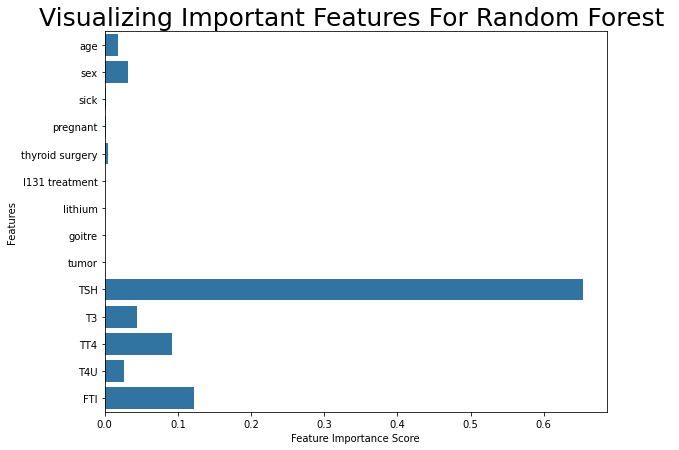

In [37]:
plt.figure(figsize=(9,7))
feature_imp1 = rf.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For Random Forest ",{'fontsize':25})
plt.show();

In [38]:
x_smote.drop(['sick', 'pregnant', 'I131 treatment',
              'lithium', 'goitre', 'tumor'], axis=1, inplace=True)
X_test.drop(['sick', 'pregnant', 'I131 treatment',
              'lithium', 'goitre', 'tumor'], axis=1, inplace=True)


In [39]:
new_rf = RandomForestClassifier()
new_rf.fit(x_smote,y_smote)
new_rf.score(X_test,y_test)

0.988950276243094

In [40]:
# with open('thyroid.pkl','wb') as f:
#     pickle.dump(new_rf,f)

In [75]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3620 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3620 non-null   int32  
 1   sex              3620 non-null   object 
 2   sick             3620 non-null   object 
 3   pregnant         3620 non-null   object 
 4   thyroid surgery  3620 non-null   object 
 5   I131 treatment   3620 non-null   object 
 6   lithium          3620 non-null   object 
 7   goitre           3620 non-null   object 
 8   tumor            3620 non-null   object 
 9   TSH              3620 non-null   float64
 10  T3               3620 non-null   float64
 11  TT4              3620 non-null   int32  
 12  T4U              3620 non-null   float64
 13  FTI              3620 non-null   int32  
 14  Label            3620 non-null   object 
dtypes: float64(3), int32(3), object(9)
memory usage: 410.1+ KB


# ROC Curve for Random Forest Classifier

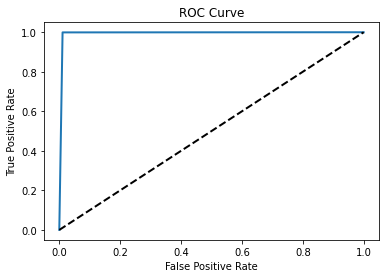

In [42]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();


rand_clf = RandomForestClassifier(criterion='entropy', 
                                  max_depth=11, 
                                  max_features=None,  # or specify another valid value
                                  min_samples_leaf=2, 
                                  min_samples_split=3, 
                                  n_estimators=130)

rand_clf.fit(x_smote, y_smote)
y_pred = rand_clf.predict(x_smote)
fpr, tpr, t = roc_curve(y_pred, y_smote)
plot_roc()

# K Neighbour Classifer

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_smote, y_smote)

KNeighborsClassifier()

In [44]:
# model predictions

y_pred = knn.predict(x_smote)

In [45]:
# accuracy score

print(accuracy_score(y_smote, knn.predict(x_smote)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9803370786516854
0.9419889502762431


In [46]:
# confusion matrix

print(confusion_matrix(y_smote, y_pred))

[[2660   10]
 [  95 2575]]


In [47]:
# classification report

print(classification_report(y_pred, y_smote,digits=4))

              precision    recall  f1-score   support

           0     0.9963    0.9655    0.9806      2755
           1     0.9644    0.9961    0.9800      2585

    accuracy                         0.9803      5340
   macro avg     0.9803    0.9808    0.9803      5340
weighted avg     0.9808    0.9803    0.9803      5340



### XGB Classifier

In [48]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Define XGBoost classifier with specified feature names
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)))

# Train and test the classifier as usual


# Train the classifier
xgb_clf.fit(x_smote, y_smote)

# Predict on the test set
y_pred = xgb_clf.predict(x_smote)

# Calculate accuracy
accuracy = accuracy_score(y_test, xgb_clf.predict(X_test))
print("Accuracy:", accuracy)

Accuracy: 0.9848066298342542


In [69]:
test_query=X_test.iloc[59].values.reshape(1,-1)
test_query

array([[19.  ,  1.  ,  0.  ,  2.3 ,  2.3 , 82.  ,  0.88, 92.  ]])

In [71]:
result=xgb_clf.predict(test_query)
print(result)

if result==0:
    print('negative')
else:
    print('positive')

[1]
positive


In [72]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(xgb_clf,f)

In [73]:
with open('model.pkl','rb') as f:
    model=pickle.load(f)

In [74]:
diagnoses = {
    0: 'negative',
    1: 'positive',
}

output=model.predict(test_query)
prediction=diagnoses.get(output[0])
print(prediction)

positive


# Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(x_smote, y_smote)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [50]:
# best parameters

grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'splitter': 'best'}

In [51]:
# best score

grid_search_dt.best_score_

0.9904494382022472

In [52]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
dtc.fit(x_smote, y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=8,
                       splitter='random')

In [53]:
y_pred = dtc.predict(x_smote)

In [54]:
# accuracy score
print(accuracy_score(y_smote, dtc.predict(x_smote)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

0.994943820224719
0.962707182320442


In [55]:
# confusion matrix

print(confusion_matrix(y_smote, y_pred))

[[2661    9]
 [  18 2652]]


In [56]:
print(classification_report(y_pred, y_smote,digits=4))

              precision    recall  f1-score   support

           0     0.9966    0.9933    0.9950      2679
           1     0.9933    0.9966    0.9949      2661

    accuracy                         0.9949      5340
   macro avg     0.9949    0.9949    0.9949      5340
weighted avg     0.9949    0.9949    0.9949      5340



# SGD Classifier

In [57]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(x_smote, y_smote)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [58]:
# best parameter

grid_search.best_params_

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}

In [59]:
sgd = SGDClassifier(alpha=0.001, loss='log_loss', penalty='l2')
sgd.fit(x_smote, y_smote)


SGDClassifier(alpha=0.001, loss='log_loss')

In [60]:
# model predictions

y_pred = sgd.predict(X_test)

In [61]:
# accuracy score

print(accuracy_score(y_smote, sgd.predict(x_smote)))

sgd_acc = accuracy_score(y_test, sgd.predict(X_test))
print(sgd_acc)

0.9421348314606741
0.9433701657458563


In [62]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 53   1]
 [ 40 630]]


In [63]:
# classification report

print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.5699    0.9815    0.7211        54
           1     0.9984    0.9403    0.9685       670

    accuracy                         0.9434       724
   macro avg     0.7842    0.9609    0.8448       724
weighted avg     0.9665    0.9434    0.9500       724



# Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(x_smote, y_smote)

# best parameters

grid_search_gbc.best_params_

# best score

grid_search_gbc.best_score_

gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 200)
gbc.fit(x_smote,y_smote)

y_pred = gbc.predict(X_test)

# accuracy score

print(accuracy_score(y_smote, gbc.predict(x_smote)))

gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(gbc_acc)

# confusion matrix

print(confusion_matrix(y_test, y_pred))
# classification report

print(classification_report(y_test, y_pred,digits=4))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
1.0
0.9751381215469613
[[ 42  12]
 [  6 664]]
              precision    recall  f1-score   support

           0     0.8750    0.7778    0.8235        54
           1     0.9822    0.9910    0.9866       670

    accuracy                         0.9751       724
   macro avg     0.9286    0.8844    0.9051       724
weighted avg     0.9742    0.9751    0.9745       724



# Stochastic Gradient Boosting (SGB)

In [65]:
sgbc = GradientBoostingClassifier(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200, random_state=0)

sgbc.fit(x_smote, y_smote)

y_pred = sgbc.predict(X_test)

# accuracy score

print(accuracy_score(y_smote, sgbc.predict(x_smote)))

sgbc_acc = accuracy_score(y_test, y_pred)
print(sgbc_acc)

# confusion matrix

print(confusion_matrix(y_test, y_pred))

# classification report

print(classification_report(y_test, y_pred,digits=4))

1.0
0.9820441988950276
[[ 45   9]
 [  4 666]]
              precision    recall  f1-score   support

           0     0.9184    0.8333    0.8738        54
           1     0.9867    0.9940    0.9903       670

    accuracy                         0.9820       724
   macro avg     0.9525    0.9137    0.9321       724
weighted avg     0.9816    0.9820    0.9816       724



# Ada Boost Classifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

ada = AdaBoostClassifier(dtc, n_estimators = 180)
ada.fit(x_smote, y_smote)

y_pred = ada.predict(X_test)

# accuracy score

print(accuracy_score(y_smote, ada.predict(x_smote)))

ada_acc = accuracy_score(y_test, y_pred)
print(ada_acc)

# confusion matrix

print(confusion_matrix(y_test, y_pred))

# classification report

print(classification_report(y_test, y_pred,digits=4))

1.0
0.9779005524861878
[[ 48   6]
 [ 10 660]]
              precision    recall  f1-score   support

           0     0.8276    0.8889    0.8571        54
           1     0.9910    0.9851    0.9880       670

    accuracy                         0.9779       724
   macro avg     0.9093    0.9370    0.9226       724
weighted avg     0.9788    0.9779    0.9783       724



# Correlation Matrix

In [67]:
import plotly.graph_objs as go
import plotly.offline as py

# Remove non-numeric columns from DataFrame
numeric_df = thyroid_df.select_dtypes(include='number')

# Compute correlation matrix
correlation = numeric_df.corr()

# Rest of your plotting code remains the same

#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)